# Team Name: Aniket Kale and Jathin Reddy

- R Package study
- Neural Network

- Why am i very much curious about the NN package?
- NN become the most vital part of the Machine Learning Engineer life.My observations is NN solve the problems with more accurately as compared to other traditional algorithms
but at the end its still depend on the problem statement.
- When I mean more accuracy that means the way NN learn the data is really amazing.
- I have worked on Many NN packages in other language but I just wanted to explore the NN package on R platform.

# Basic info from R docs about the NN

- neuralnet is used to train neural networks using backpropagation, resilient backpropagation (RPROP) with (Riedmiller, 1994) or without weight backtracking (Riedmiller and Braun, 1993) or the modified globally convergent version (GRPROP) by Anastasiadis et al. (2005). The function allows flexible settings through custom-choice of error and activation function. Furthermore the calculation of generalized weights (Intrator O. and Intrator N., 1993) is implemented.

In [14]:
# Let’s see by loading the data as well as the How we can use the other features of the Package
library(neuralnet)
library(datasets)

# General Introduction of Package and demo of pkg.

-  Get the data
-  Load the data
-  Train the model by using NN
-  Set the Hidden layers if we are using the more hidden layers that  means we’re trying to make the more computation’s.
-  Check the result


In [18]:
# We are using the infert data.
data <- (infert)
head(data)

education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0-5yrs,26,6,1,1,2,1,3
0-5yrs,42,1,1,1,0,2,1
0-5yrs,39,6,2,1,0,3,4
0-5yrs,34,4,2,1,0,4,2
6-11yrs,35,3,1,1,1,5,32
6-11yrs,36,4,2,1,1,6,36


# ?infert
- This is a matched case-control study dating from before the availability of conditional logistic regression.
- Our Y : Case
- Other X: Independent var

In [21]:
dim(data)

[1] 248   8

In [22]:
# we have 248 rows and 8 cols

In [31]:
nn <- neuralnet(case~age+parity+induced+spontaneous,data=data, hidden=2, err.fct="sse",linear.output=FALSE)
nn

Call: neuralnet(formula = case ~ age + parity + induced + spontaneous,     data = data, hidden = 2, err.fct = "sse", linear.output = FALSE)

1 repetition was calculated.

        Error Reached Threshold Steps
1 19.39541071    0.008717283437  3736


- From above case we can see the result. that is end result and with 3336 steps means it trai the 3336 times
- Threshold means our least error in 3336 steps is 19.39 which is very less by training NN

# Error Metric
- a differentiable function that is used for the calculation of the error. Alternatively, the strings 'sse' and 'ce' which stand for the sum of squared errors and the cross-entropy can be used.

- Example: The weight for the path from input ‘age’ to the first hidden layer is  -3.0689 (age.to.1layhid1) which can easily be found in the network diagram. After all inputs feed into hidden layer 1, the weight associated with the path from hidden layer 1(1layhid.1.to.case) to the output layer (which along with information from the other layers of the network will give us the classification of ‘case’) is -1001.15

In [28]:
# All the values after first layer and second layer.
nn$result.matrix

,1
error,157.272908791603
reached.threshold,0.009612927645
steps,247.000000000000
Intercept.to.1layhid1,-1.429151637439
age.to.1layhid1,-0.667748583883
parity.to.1layhid1,2.661805858876
induced.to.1layhid1,0.975784075324
spontaneous.to.1layhid1,-25.216641798939
Intercept.to.1layhid2,0.050317822002
age.to.1layhid2,1.745430276969


In [32]:
# From above graph we can see the weight of each parameter.

In [40]:
out <- cbind(nn$covariate,nn$net.result[[1]])
dimnames(out) <- list(NULL, c("age", "parity","induced","spontaneous","nn-output"))
head(out)

age,parity,induced,spontaneous,nn-output
26,6,1,2,0.2102068572
42,1,1,0,0.6131495111
39,6,2,0,0.2095910031
34,4,2,0,0.2349796366
35,3,1,1,0.5193492271
36,4,2,1,0.6888823104


In [44]:
nn$net.result

1,0.2102068572
2,0.6131495111
3,0.2095910031
4,0.2349796366
5,0.5193492271
6,0.6888823104
7,0.2173897452
8,0.1944579277
9,0.3086580419
10,0.2115016342
11,0.2372396363


In [43]:
# The given data is saved in nn$covariate and
# nn$response as well as in nn$data for the whole data
# set inclusive non-used variables. The output of the
# neural network, i.e. the fitted values o(x), is provided
# by nn$net.result

In [45]:
library(neuralnet)
AND <- c(rep(0, 7), 1)
OR <- c(0, rep(1, 7))
binary_data <- data.frame(expand.grid(c(0, 1), c(0, 1), c(0, 1)), AND, OR)
mod <- neuralnet(AND + OR ~ Var1 + Var2 + Var3, binary_data,
                 hidden = c(6, 12, 8), rep = 10, err.fct = 'ce', linear.output = FALSE)
 

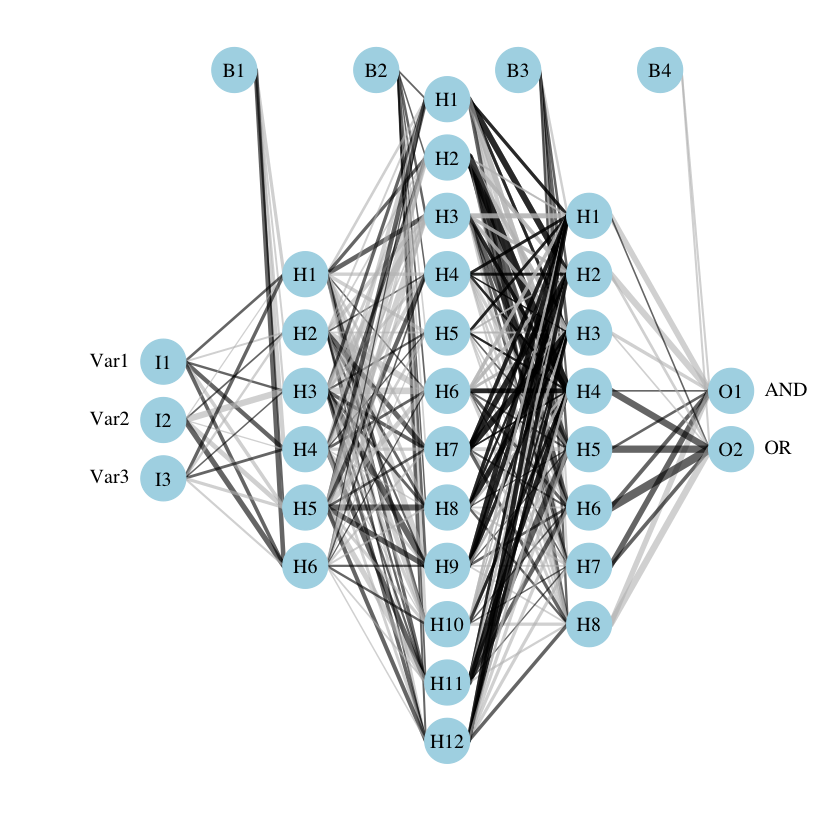

In [48]:
# plotnet
library(NeuralNetTools)
par(mar = numeric(4), family = 'serif')
plotnet(mod, alpha = 0.6)

- From above Diagrame, we can see the Backpropagation In NN.
- and the output we can see in 0 or 1 at the end
- but in middle you will see all the hidden layers here we have 3

- Above plot is just for the understanding purpose how the NN works. its Black box that why very difficult to understand

- The learning rate determine how much the backpropagation can affect the weight at each iteration. A high learning rate mean that during the training of the neural network, each iteration can strongly change the value of the weight or, to put in other way, the algorithm learn a lot of each observation in your data set. This mean that outlier could easily affect your weight and make your algorithm diverge from the path of the ideal weights for your problem. A small learning rate mean that the algorithm learn less from each observation in your data set, so your neural network is less affected by outlier, but this mean that you will need more observations to make a good model.

- REFERENCE:
- https://www.rdocumentation.org/packages/neuralnet/versions/1.33/topics/neuralnet